# Error Analysis

In [1]:
import torch
from torchvision import models
from data_augmentation import DataAugmentation
from image_dataset import ImageDataset
import utils
from operator import eq, gt
import eval_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
device = None
if torch.cuda.is_available():
    print("Using GPU")
    device = torch.device("cuda:0")
else:
    print("Using CPU")
    device = torch.device("cpu")

Using CPU


In [3]:
mapping_file = "file_to_labels_table.csv"
df = pd.read_csv(mapping_file)
train_idx, val_idx = utils.get_train_val_indexes(df, 0.85, shuffle=False)
val_test_split_idx = int(val_idx.shape[0]*.5)
test_idx = val_idx[:val_test_split_idx]
val_idx = val_idx[val_test_split_idx:]

dataAugmentation = DataAugmentation()
testDataset = ImageDataset(test_idx, dataAugmentation=dataAugmentation)

Define model here:

In [61]:
# exp_transfer_learning_1.ipynb

preTrainedModel = models.resnext50_32x4d(pretrained=True)

for param in preTrainedModel.parameters():
    param.requires_grad = False

num_ftrs = preTrainedModel.fc.in_features
num_classes = 14

preTrainedModel.fc = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, num_classes),
    torch.nn.Sigmoid()
)

model = preTrainedModel.to(device)
# This should be the path to the pkl-file of the model
filename = "/home/matleino/Desktop/DeepLearning2020/project_code/models/Deep learning project files/exp_transfer_learning_1_model.pkl"
model.load_state_dict(torch.load(filename))

<All keys matched successfully>

In [62]:
# exp_transfer_learning_2.ipynb

preTrainedModel = models.resnext50_32x4d(pretrained=True)

for param in preTrainedModel.parameters():
    param.requires_grad = False

num_ftrs = preTrainedModel.fc.in_features
num_classes = 14

preTrainedModel.fc = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, num_classes),
    torch.nn.Sigmoid()
)

model = preTrainedModel.to(device)
filename = "/home/matleino/Desktop/DeepLearning2020/project_code/models/Deep learning project files/exp_transfer_learning_2_model.pkl"
model.load_state_dict(torch.load(filename))

<All keys matched successfully>

In [4]:
# exp_transfer_learning_3.ipynb

preTrainedModel = models.resnext50_32x4d(pretrained=True)

for param in preTrainedModel.parameters():
    param.requires_grad = False

num_ftrs = preTrainedModel.fc.in_features
num_classes = 14

preTrainedModel.fc = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, num_classes),
    torch.nn.Sigmoid()
)

model = preTrainedModel.to(device)
filename = "/home/matleino/Desktop/DeepLearning2020/project_code/models/Deep learning project files/exp_transfer_learning_3_model.pkl"
model.load_state_dict(torch.load(filename))

<All keys matched successfully>

In [6]:
# shallow_net_experiment.ipynb

from reseption_net import ReseptionNet
from convolution_components import BasicConv2d, MaxPooling, IdentityConv2d

torch.cuda.empty_cache()

basicInceptionConfig = {
    "branches": [
        {
            "blocks": [
                {
                    "convolution": BasicConv2d,
                    "outputChannelMultiplier": 3,
                    "kernelSize": 3,
                    "padding": 1,
                    "stride": 1,
                    "dilation": 1,
                    "grouping": True,
                },
                {   
                    "convolution": BasicConv2d,
                    "outputChannelMultiplier": 1,
                    "kernelSize": 4,
                    "padding": 0,
                    "stride": 4,
                    "dilation": 1,
                    "grouping": True,
                }
            ]
        },
        {
            "blocks": [
                {
                    "convolution": BasicConv2d,
                    "outputChannelMultiplier": 3,
                    "kernelSize": 5,
                    "padding": 2,
                    "stride": 1,
                    "dilation": 1,
                    "grouping": True,
                },
                {   
                    "convolution": BasicConv2d,
                    "outputChannelMultiplier": 1,
                    "kernelSize": 4,
                    "padding": 0,
                    "stride": 4,
                    "dilation": 1,
                    "grouping": True,
                }
            ]
        },
        {
            "blocks": [
                {
                    "convolution": BasicConv2d,
                    "outputChannelMultiplier": 3,
                    "kernelSize": 7,
                    "padding": 3,
                    "stride": 1,
                    "dilation": 1,
                    "grouping": True,
                },
                {   
                    "convolution": BasicConv2d,
                    "outputChannelMultiplier": 1,
                    "kernelSize": 4,
                    "padding": 0,
                    "stride": 4,
                    "dilation": 1,
                    "grouping": True,
                }
            ]
        }
        
    ],
    "shortcut": {
        "convolution": IdentityConv2d,
        "kernelSize": 1,
        "padding": 0,
        "stride": 4,
        "dilation": 1,
        "grouping": True,
    }
}

combinerConfig = {
    "branches": [
        {
            "blocks": [
                {
                    "convolution": BasicConv2d,
                    "outputChannelMultiplier": 1,
                    "kernelSize": 7,
                    "padding": 0,
                    "stride": 7,
                    "dilation": 1,
                    "grouping": True,
                }
            ]
        }
    ],
    "shortcut": {
        "convolution": IdentityConv2d,
        "kernelSize": 1,
        "padding": 0,
        "stride": 7,
        "dilation": 1,
        "grouping": True,
    }
}
    
config = {
    "inceptions": [
        {
            "config": basicInceptionConfig,
            "amount": 2,
        },
        {
            "config": combinerConfig,
            "amount": 1,
        },
    ],
    "inChannels": 3,
    "inDimensions": (224, 224),
    "outputs": 14,
}

model = ReseptionNet(device, config)
# This should be the path to the pkl-file of the model
filename = ""
model.load_state_dict(torch.load(filename, map_location = torch.device('cpu')))

inception 1 iteration 1 layer output dimensions 27 * 56 * 56 = 84672
inception 1 iteration 2 layer output dimensions 243 * 14 * 14 = 47628
inception 2 iteration 1 layer output dimensions 243 * 2 * 2 = 972


<All keys matched successfully>

In [ ]:
# deep_net_experiment.ipynb


In [5]:
def plot_imgs_with_labels(dataset, y_hats, sample, pltsize = 6, rows = 4, cols = 3):
    """ Used for error analysis.
    Args:
      - 
    Kwargs:
      - 
    returns  """
    labelList = np.array(pd.read_csv("file_to_labels_table.csv").columns[1:])
    pltsize = 6
    rows = 6
    cols = 3
    plt.figure(figsize=(3 * pltsize, 4 * pltsize))
    for i in range(len(sample)):
        i_idx = sample[i]
        datum = dataset[i_idx]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.imshow(datum["imagePil"])
        plt.title("{} : {}".format(datum["labelsString"], labelList[np.array(y_hats[i_idx], dtype = 'bool')]))

In [6]:
y_hats, y_trues = eval_model.test_model(model, testDataset, device)
y_hats = np.array(y_hats)
y_trues = np.array(y_trues)

Let's plot the distribution in the number of mislabelings:

[650 458 251  99  37   5   0   0   0   0   0   0   0   0]


Text(0, 0.5, '# of images')

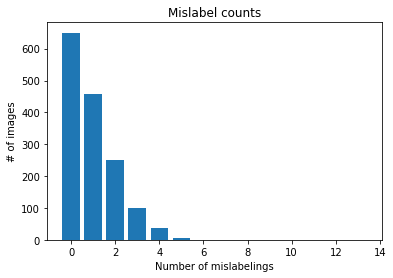

In [6]:
mislabels = utils.get_mislabels_count_distribution(y_hats, y_trues)
print(mislabels)

plt.bar(np.arange(14, dtype = 'int'), mislabels)
plt.title('Mislabel counts')
plt.xlabel('Number of mislabelings')
plt.ylabel('# of images')


Let's get some examples of images where the original image was unlabeled but the classifier gave that image a label.

[1165  541 1360  371 1461 1398  116  284  391  971 1268  321  305  114
  789 1159  769  882]


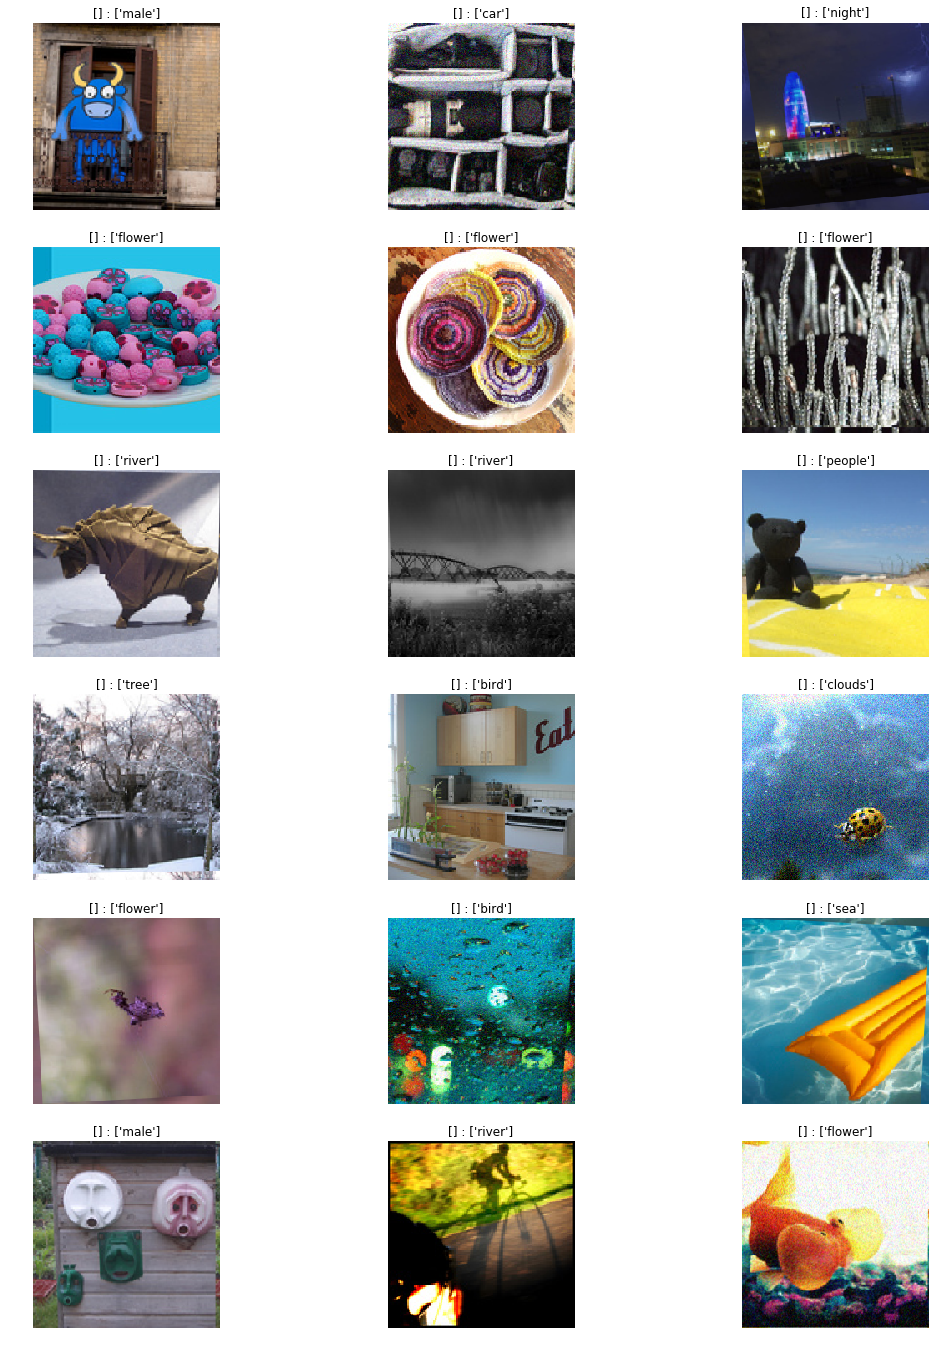

In [64]:
idx_set = utils.get_indexes_for_mislabelled_images(testDataset, y_trues, y_hats, mislabels_count = 1, true_labels_count = 0, y_hat_labels_count = 1, operators = [eq, eq] ,sample_size = 18)
print(idx_set)

plot_imgs_with_labels(testDataset, y_hats, idx_set, rows = 6, cols = 3)

Lets get some examples of images with most mislabelings:

[650 458 251  99  37   5   0   0   0   0   0   0   0   0]
[4, 5]


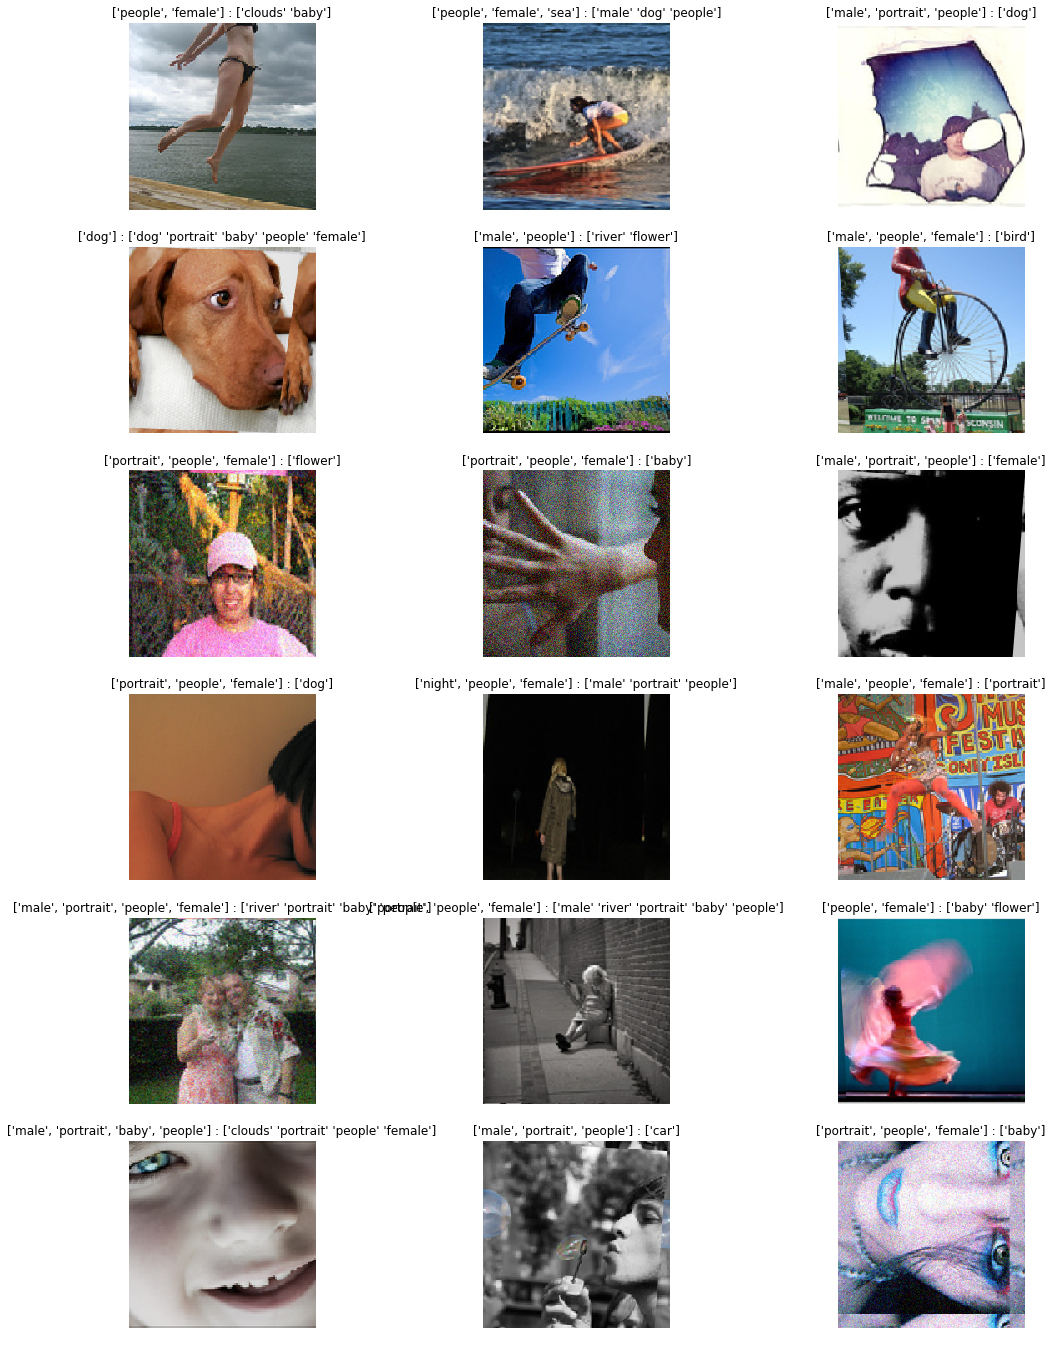

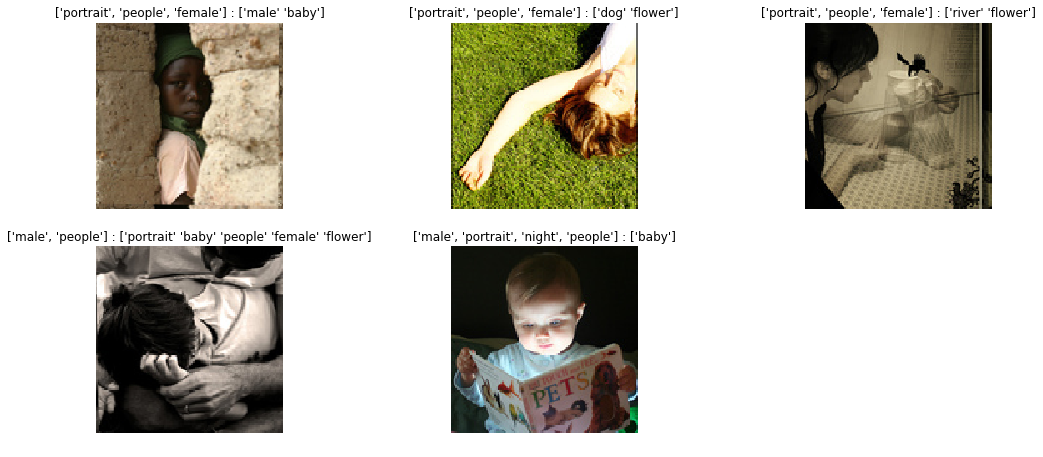

In [62]:
mislabels = utils.get_mislabels_count_distribution(y_hats, y_trues)
print(mislabels)
idx = np.count_nonzero(mislabels != 0) - 1
idxs = [idx - 1, idx]
print(idxs)

for idx in idxs:
    idx_set = utils.get_indexes_for_mislabelled_images(testDataset, y_trues, y_hats, mislabels_count = idx, true_labels_count = 0, y_hat_labels_count = 0, operators = [gt, gt], sample_size = 18)
    plot_imgs_with_labels(testDataset, y_hats, idx_set, rows = 6, cols = 3)

Lets calculate the number of cases where each label was misclassified. Each count marks a case where either the image had that label for real and the classifier didn't give it that label or classifier gave it that label even though the original image did not have it.

In [27]:
mislabelings_for_each_label = utils.get_mislabels_count_for_each_label(y_hats, y_trues)

labels = list(map(lambda x: x[0], mislabelings_for_each_label))
counts = list(map(lambda x: x[1], mislabelings_for_each_label))

df = pd.DataFrame({'Label':labels, 'Count':counts})
print(df)

       Label  Count
0     clouds     87
1       male    226
2       bird     37
3        dog     34
4      river     86
5   portrait    158
6       baby     89
7      night    125
8     people    224
9     female    165
10       sea     27
11      tree     32
12       car     33
13    flower    107


Lets find examples of images with label 'male' that were mislabeled by the classifier:

male


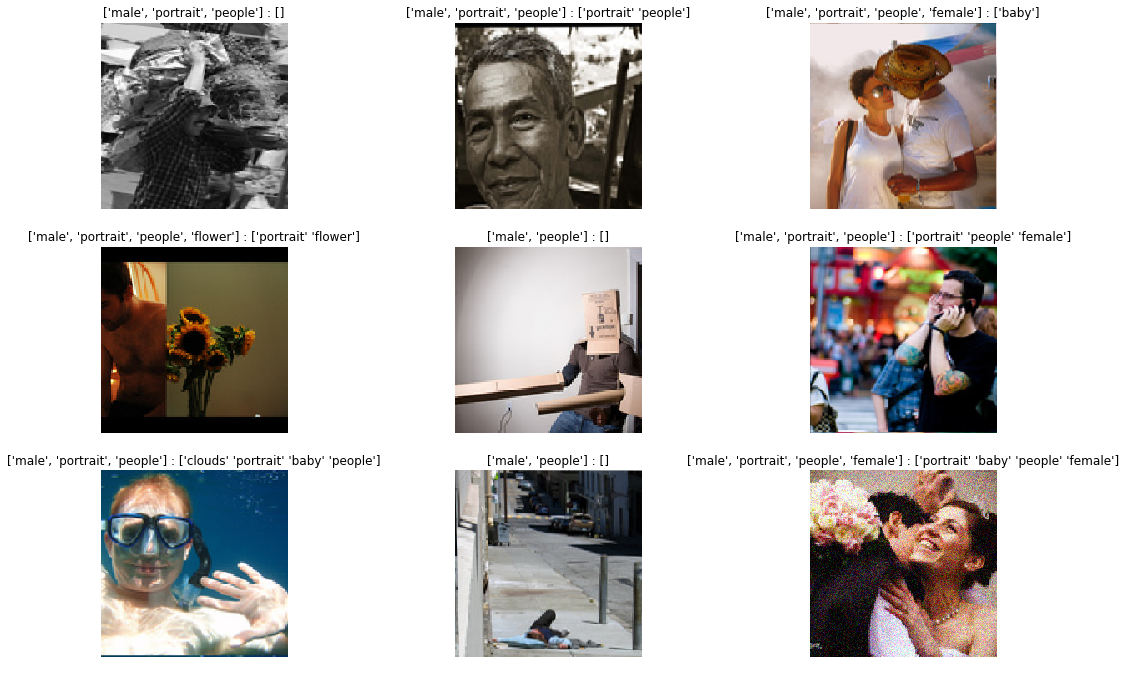

In [8]:
label_idx = 1

idxs = utils.get_indexes_of_mislabeled_images_with_label(1, y_trues, y_hats)
plot_imgs_with_labels(testDataset, y_hats, idxs[0:9], rows = 3, cols = 3)